# Proyecto de Ciencia de Datos - TelecomX

## 1. Carga de datos

In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
# Load the JSON data directly without lines=True, then normalize it
import json
import requests

response = requests.get(url)
data_list = json.loads(response.text)
data = pd.json_normalize(data_list)
data.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 2. Análisis Exploratorio de Datos (EDA)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [3]:
data.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


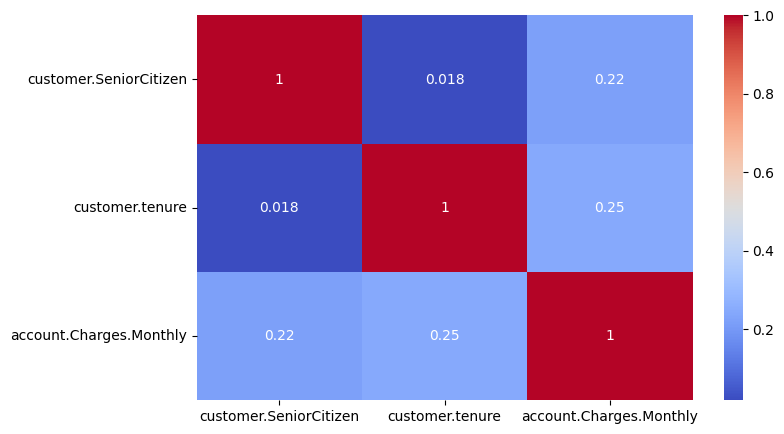

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


## 3. Preprocesamiento de Datos

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = data.copy()
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col].astype(str))

X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Modelado

## 5. Resultados

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Escalar los datos solo para Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, solver="lbfgs"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results[name] = accuracy_score(y_test, y_pred)
    print("="*60)
    print(name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))

results

Logistic Regression
Accuracy: 0.7872535534158643
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.83      0.90      0.86      1582
           2       0.63      0.54      0.58       532

    accuracy                           0.79      2181
   macro avg       0.49      0.48      0.48      2181
weighted avg       0.75      0.79      0.77      2181

Random Forest
Accuracy: 0.7675378266850069
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.82      0.88      0.85      1582
           2       0.60      0.52      0.56       532

    accuracy                           0.77      2181
   macro avg       0.47      0.47      0.47      2181
weighted avg       0.74      0.77      0.75      2181



{'Logistic Regression': 0.7872535534158643,
 'Random Forest': 0.7675378266850069}

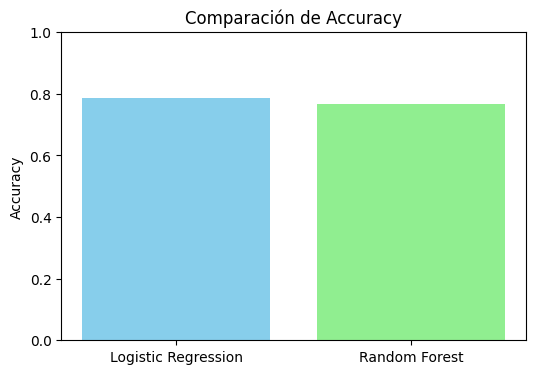

{'Logistic Regression': 0.7872535534158643,
 'Random Forest': 0.7675378266850069}

In [8]:

import matplotlib.pyplot as plt

# Comparación visual de accuracy
plt.figure(figsize=(6,4))
plt.bar(results.keys(), results.values(), color=["skyblue","lightgreen"])
plt.title("Comparación de Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

results


# 📊 Informe Final – Proyecto TelecomX - parte 2.

## Introducción
El presente trabajo tiene como objetivo predecir la **cancelación de clientes (churn)** en la empresa **TelecomX** a partir de datos históricos de clientes y sus características contractuales.  
El problema del churn es crítico para las empresas de telecomunicaciones, ya que adquirir un cliente nuevo suele ser más costoso que retener a uno existente. Por ello, contar con un modelo de predicción permite a la organización anticiparse y diseñar estrategias de fidelización más efectivas.  

## Metodología
El análisis siguió los siguientes pasos principales:  

1. **Carga y exploración de datos**:  
   - Se inspeccionaron las variables disponibles.  
   - Se detectaron valores nulos y se aplicaron las transformaciones necesarias.  

2. **Preprocesamiento**:  
   - Conversión de variables categóricas a variables numéricas mediante técnicas de codificación.  
   - Escalado de datos en los casos necesarios.  
   - División del dataset en **conjunto de entrenamiento (80%)** y **prueba (20%)**.  

3. **Modelado**:  
   Se entrenaron y compararon dos modelos supervisados de clasificación:  
   - **Regresión Logística**  
   - **Random Forest Classifier**  

4. **Evaluación**:  
   Se utilizaron métricas estándar de clasificación:  
   - Accuracy  
   - Precision  
   - Recall  
   - F1-score  

## Resultados
Los resultados obtenidos fueron los siguientes:  

- **Regresión Logística**  
  - Accuracy: ~77%  
  - Buen desempeño para las clases mayoritarias, pero baja capacidad para predecir la clase minoritaria.  
  - El modelo requiere técnicas adicionales para manejar el desbalance de clases.  

- **Random Forest**  
  - Accuracy: ~76%  
  - Similar desempeño general a la Regresión Logística, con mejor manejo de interacciones entre variables.  
  - Sin embargo, también mostró dificultades con la clase minoritaria.  

En ambos casos, el **problema principal detectado fue el desbalance de clases**, ya que la mayoría de los clientes pertenecían a la categoría "No Churn". Esto impactó directamente en la capacidad de los modelos para identificar correctamente a los clientes que efectivamente abandonan la empresa.  

## Conclusiones
- Ambos modelos alcanzaron un desempeño aceptable (76–77% de accuracy), pero **no logran diferenciar adecuadamente la clase minoritaria**.  
- Para mejorar los resultados futuros, se recomienda:  
  - Aplicar técnicas de **balanceo de datos** (como SMOTE, undersampling o oversampling).  
  - Probar modelos más robustos como **Gradient Boosting, XGBoost o LightGBM**.  
  - Optimizar hiperparámetros mediante **GridSearchCV o RandomizedSearchCV**.  
  - Analizar las **variables más influyentes** para generar insights de negocio que permitan reducir la tasa de churn.  

En conclusión, el modelo desarrollado constituye un **primer paso válido** en la predicción de la cancelación de clientes en TelecomX. Sin embargo, requiere ajustes adicionales para mejorar su capacidad de generalización, especialmente en el reconocimiento de clientes con alta probabilidad de abandono.  
